# **Car Price Prediction**

**Implement Regression Analysis to predict the price of cars with the available independent variables.**

## **Dataset:**

1. **Car_ID:** Unique id of each observation (Interger)
2. **Symboling:** Its assigned insurance risk rating, A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.(Categorical) 
3. **carCompany:** Name of car company (Categorical)
4. **fueltype:** Car fuel type i.e gas or diesel (Categorical)
5. **aspiration:** Aspiration used in a car (Categorical)
6. **doornumber:** Number of doors in a car (Categorical)
7. **carbody:**	body of car (Categorical)
8. **drivewheel:** type of drive wheel (Categorical)
9. **enginelocation:** Location of car engine (Categorical)
10. **wheelbase:** Weelbase of car (Numeric)
11. **carlength:** Length of car (Numeric)
12.	**carwidth:** Width of car (Numeric)
13.	**carheight:** height of car (Numeric)
14.	**curbweight:** The weight of a car without occupants or baggage. (Numeric)
15. **enginetype:**	Type of engine. (Categorical)
16.	**cylindernumber:**	cylinder placed in the car (Categorical)
17.	**enginesize:**	Size of car (Numeric)
18.	**fuelsystem:**	Fuel system of car (Categorical)
19.	**boreratio:** Boreratio of car (Numeric)
20.	**stroke:**	Stroke or volume inside the engine (Numeric)
21.	**compressionratio:** compression ratio of car (Numeric)
22.	**horsepower:**	Horsepower (Numeric)
23.	**peakrpm:** car peak rpm (Numeric)
24.	**citympg:** Mileage in city (Numeric)
25.	**highwaympg:**	Mileage on highway (Numeric)
26.	**price(Dependent variable):** Price of car (Numeric)


In [ ]:
import warnings
warnings.filterwarnings(action='ignore', category=DeprecationWarning)

from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
path = "/content/Car_Prices.csv"
data_set = pd.read_csv(path)
data_set

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
data_set.set_index('car_ID', inplace=True)
data_set

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [ ]:
data_set.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
data_set.tail()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [ ]:
data_set.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 1 to 205
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [ ]:
data_set.isnull().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
data_set['drivewheel'] = data_set['drivewheel'].str.replace('4wd','fwd')
data_set

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,fwd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [ ]:
FEATURES = data_set.columns[:-1].to_list()
LABEL = "price"

FEATURES, LABEL

(['symboling',
  'CarName',
  'fueltype',
  'aspiration',
  'doornumber',
  'carbody',
  'drivewheel',
  'enginelocation',
  'wheelbase',
  'carlength',
  'carwidth',
  'carheight',
  'curbweight',
  'enginetype',
  'cylindernumber',
  'enginesize',
  'fuelsystem',
  'boreratio',
  'stroke',
  'compressionratio',
  'horsepower',
  'peakrpm',
  'citympg',
  'highwaympg'],
 'price')

In [ ]:
from typing import List

def plot_scatter(df: pd.DataFrame, features: List[str], label: str) -> None:
    plt.figure(figsize=(30, 30))
    for loc, feature in enumerate(features):
        ax = plt.subplot(5, 5, loc+1)
        sns.scatterplot(x=feature, y=label, data=df, color='red')
    plt.show()
    plt.close()
    return None 

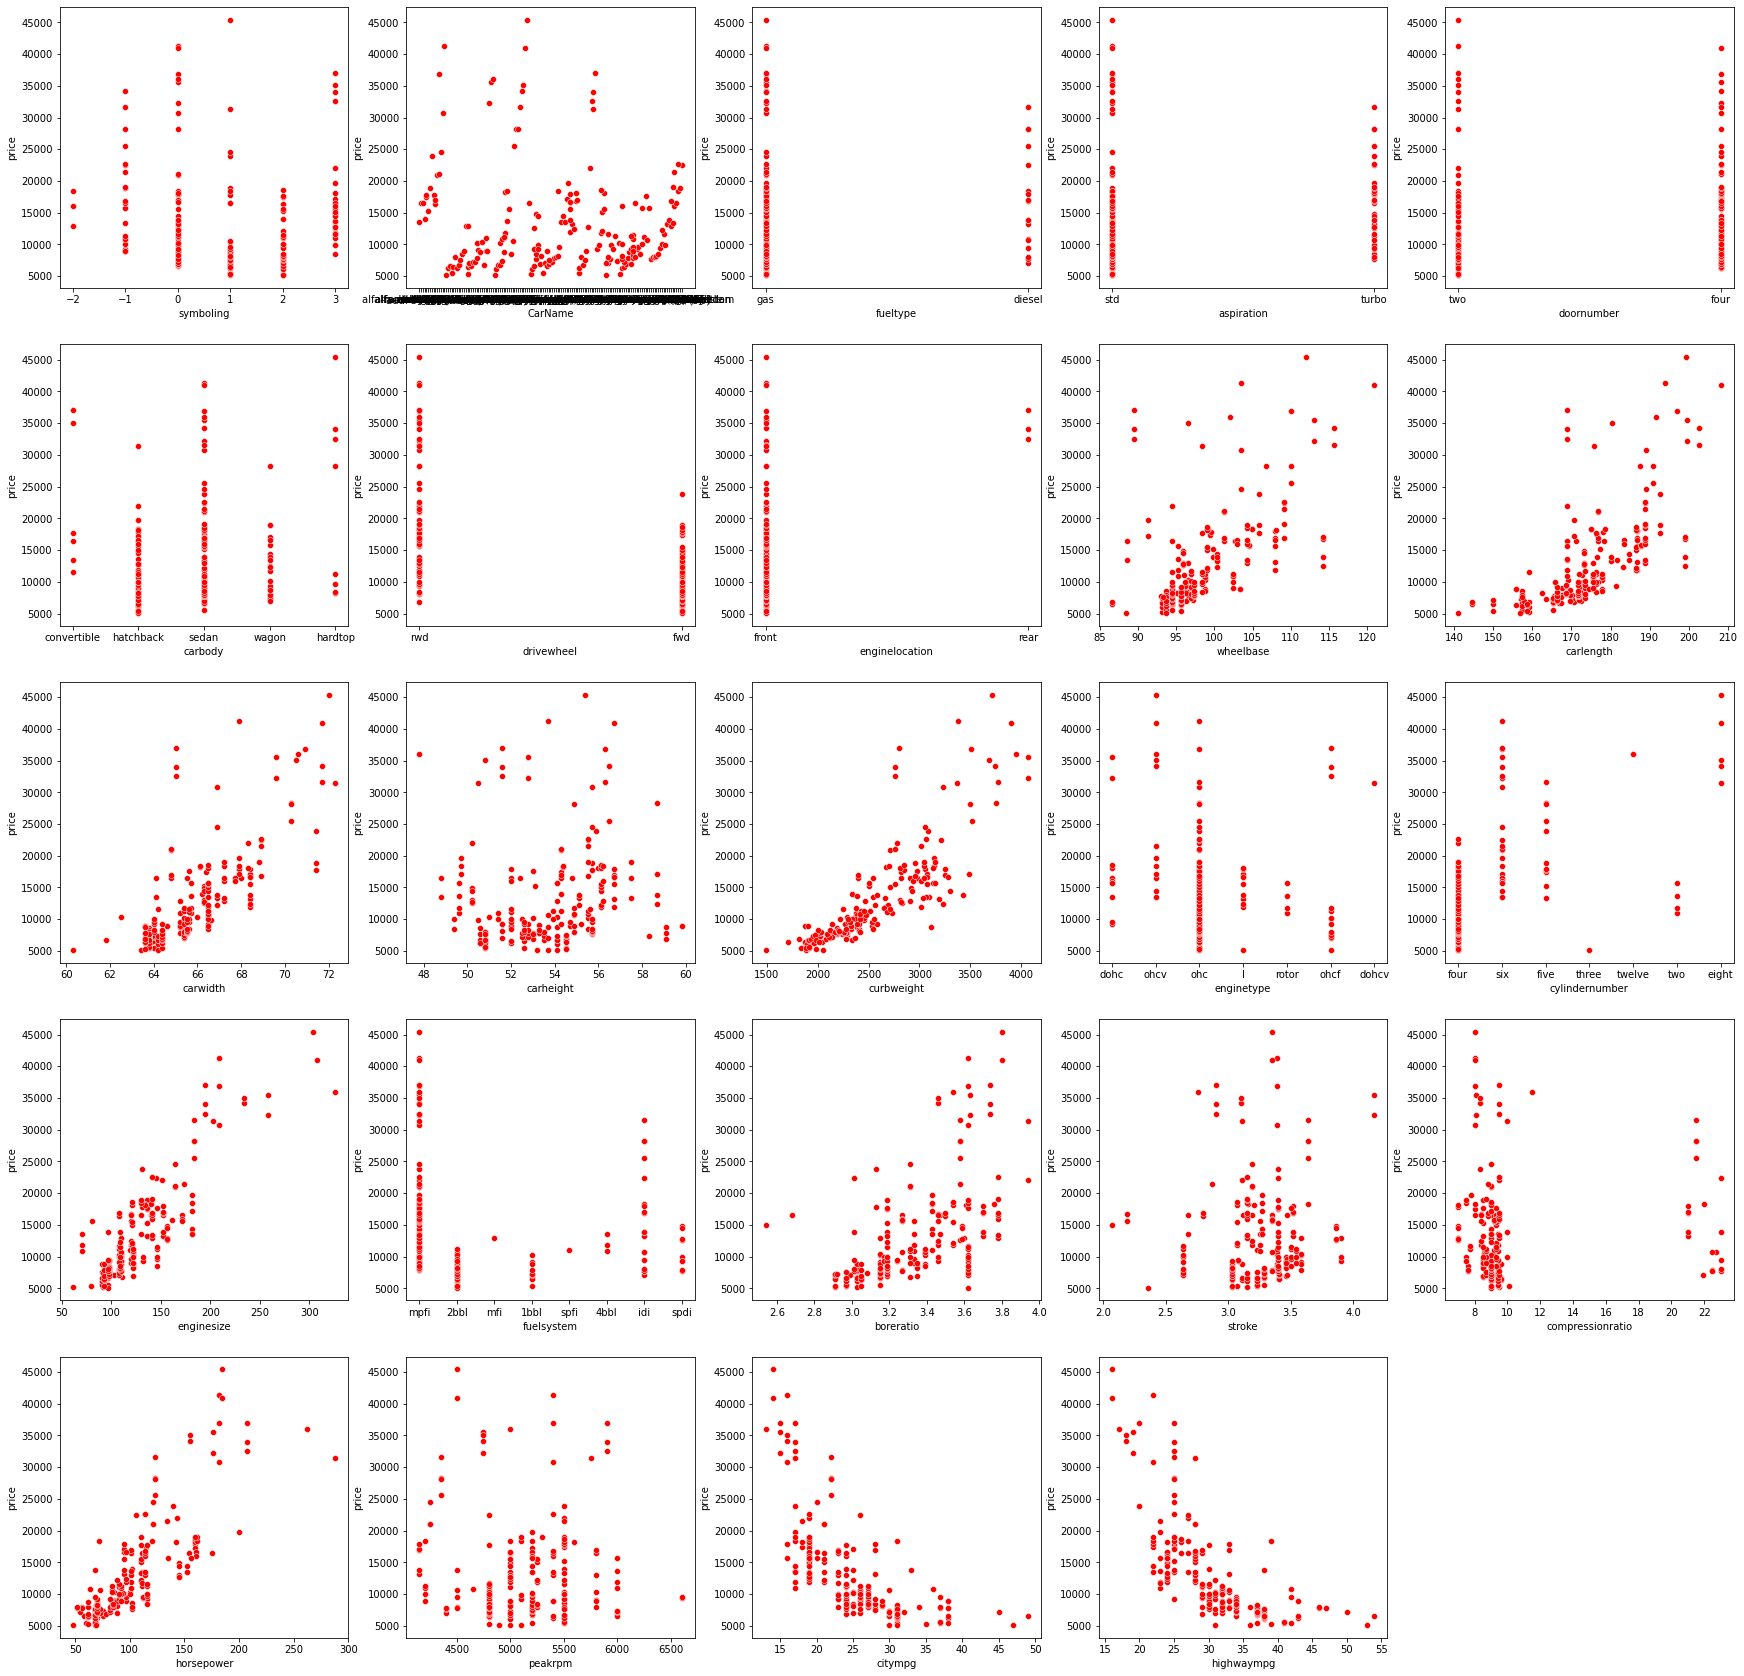

In [ ]:
plot_scatter(data_set, FEATURES, LABEL)

In [ ]:
def plot_hist(df: pd.DataFrame, features: List[str]) -> None:
    plt.figure(figsize=(30, 30))
    for loc, feature in enumerate(features):
        ax = plt.subplot(5, 5, loc+1)
        sns.histplot(df[feature], color='#E83845')
    plt.show()
    plt.close()
    return None 

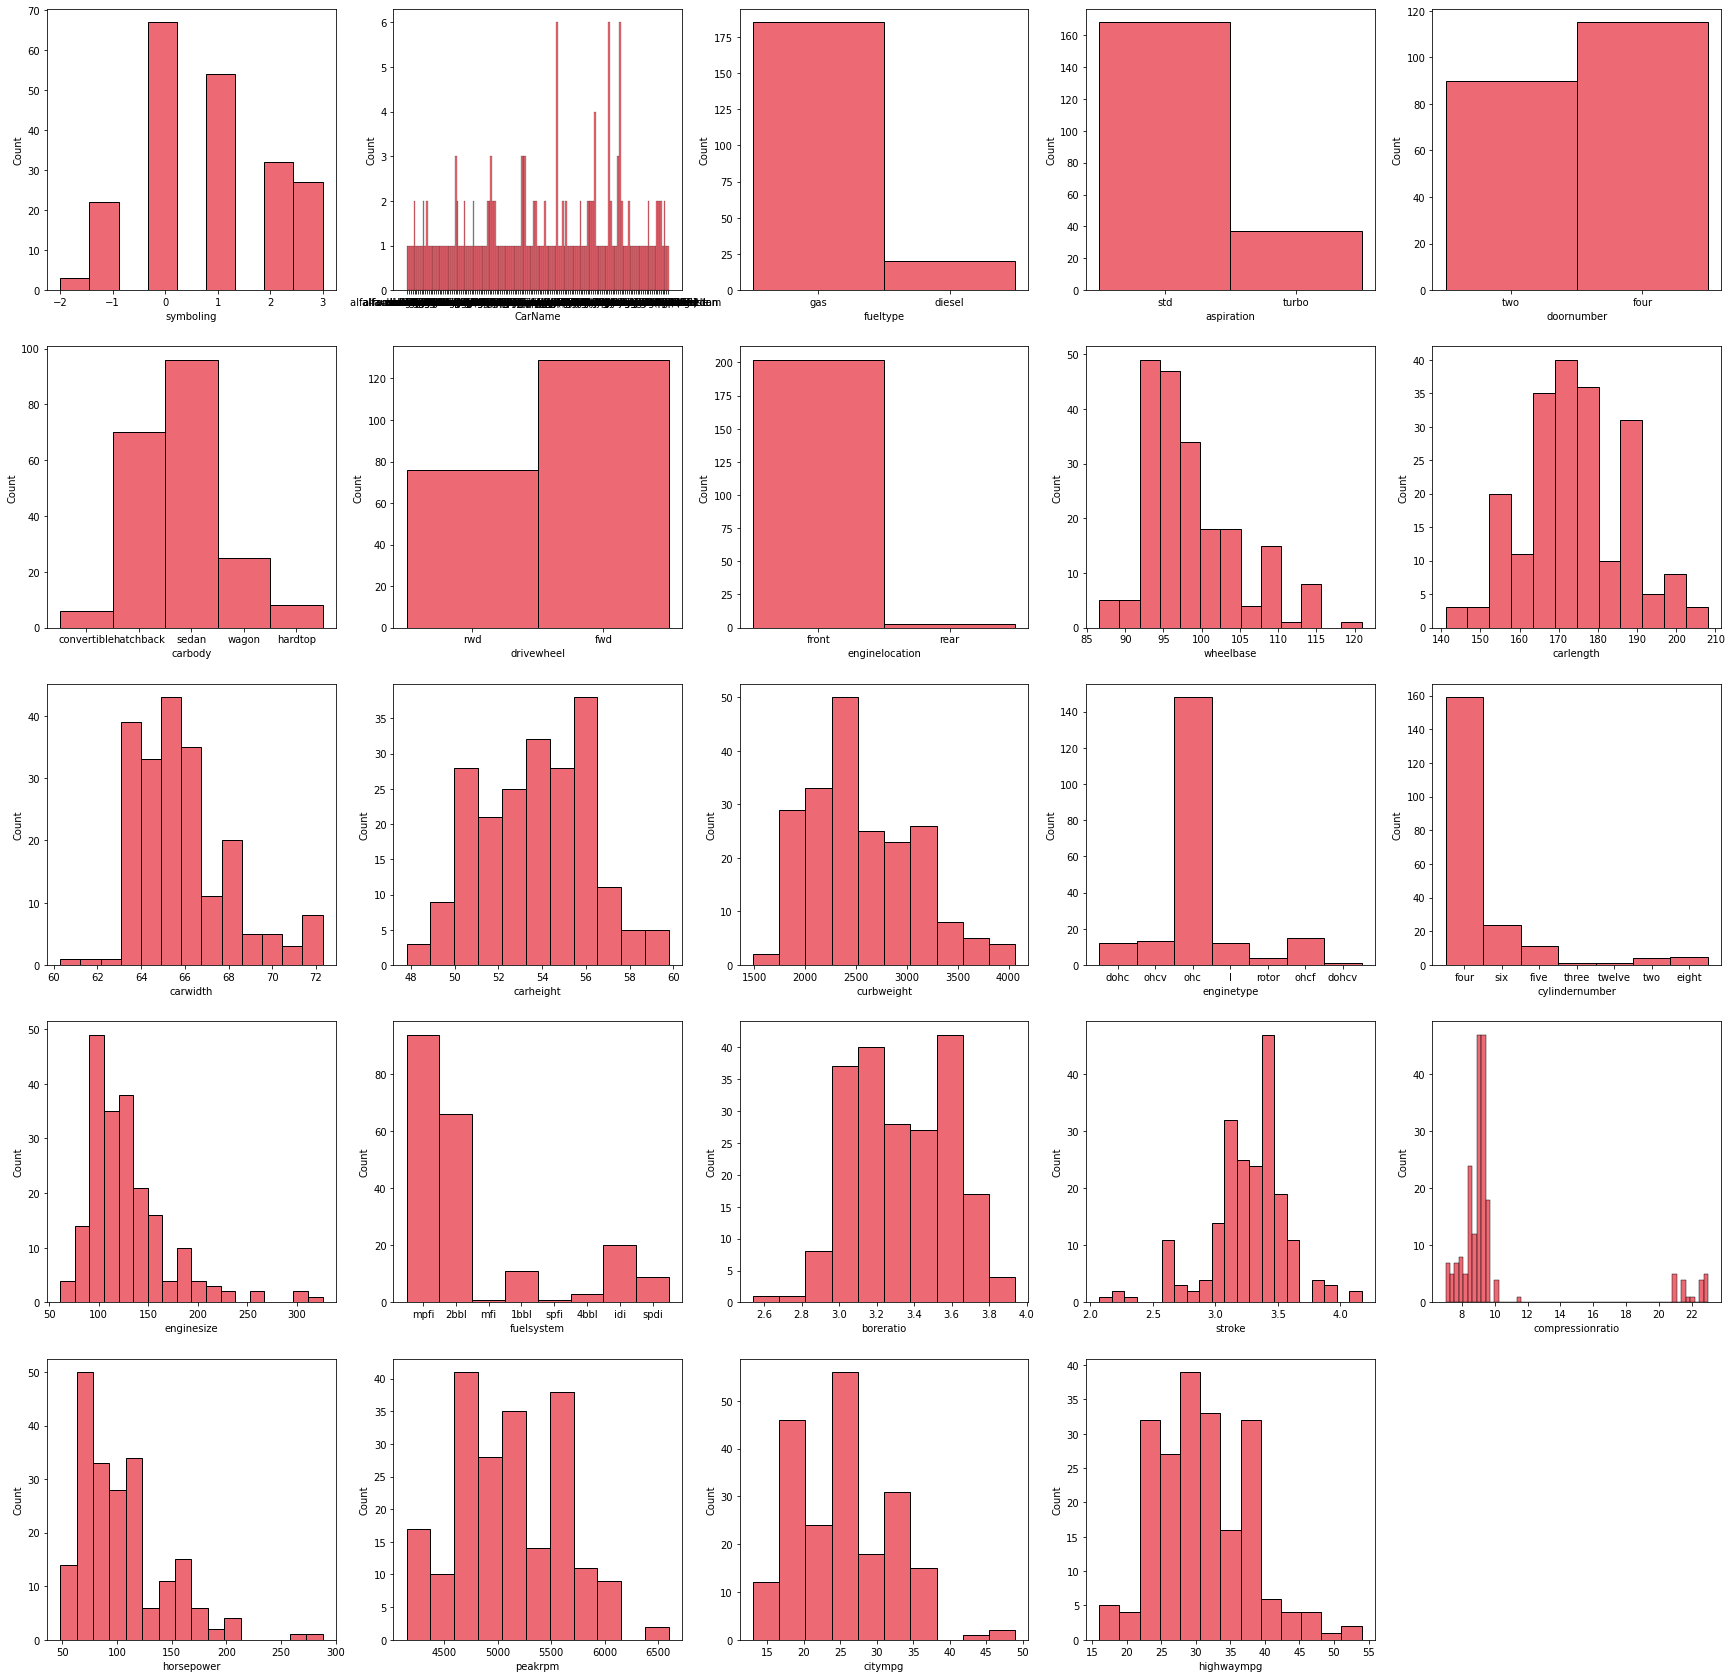

In [ ]:
plot_hist(data_set, FEATURES)

In [ ]:
def Multivariate_Analysis(): 
    plt.figure(figsize=(20, 10))
    sns.pairplot(data=data_set, hue='price')
    plt.show()
    return 


<Figure size 1440x720 with 0 Axes>

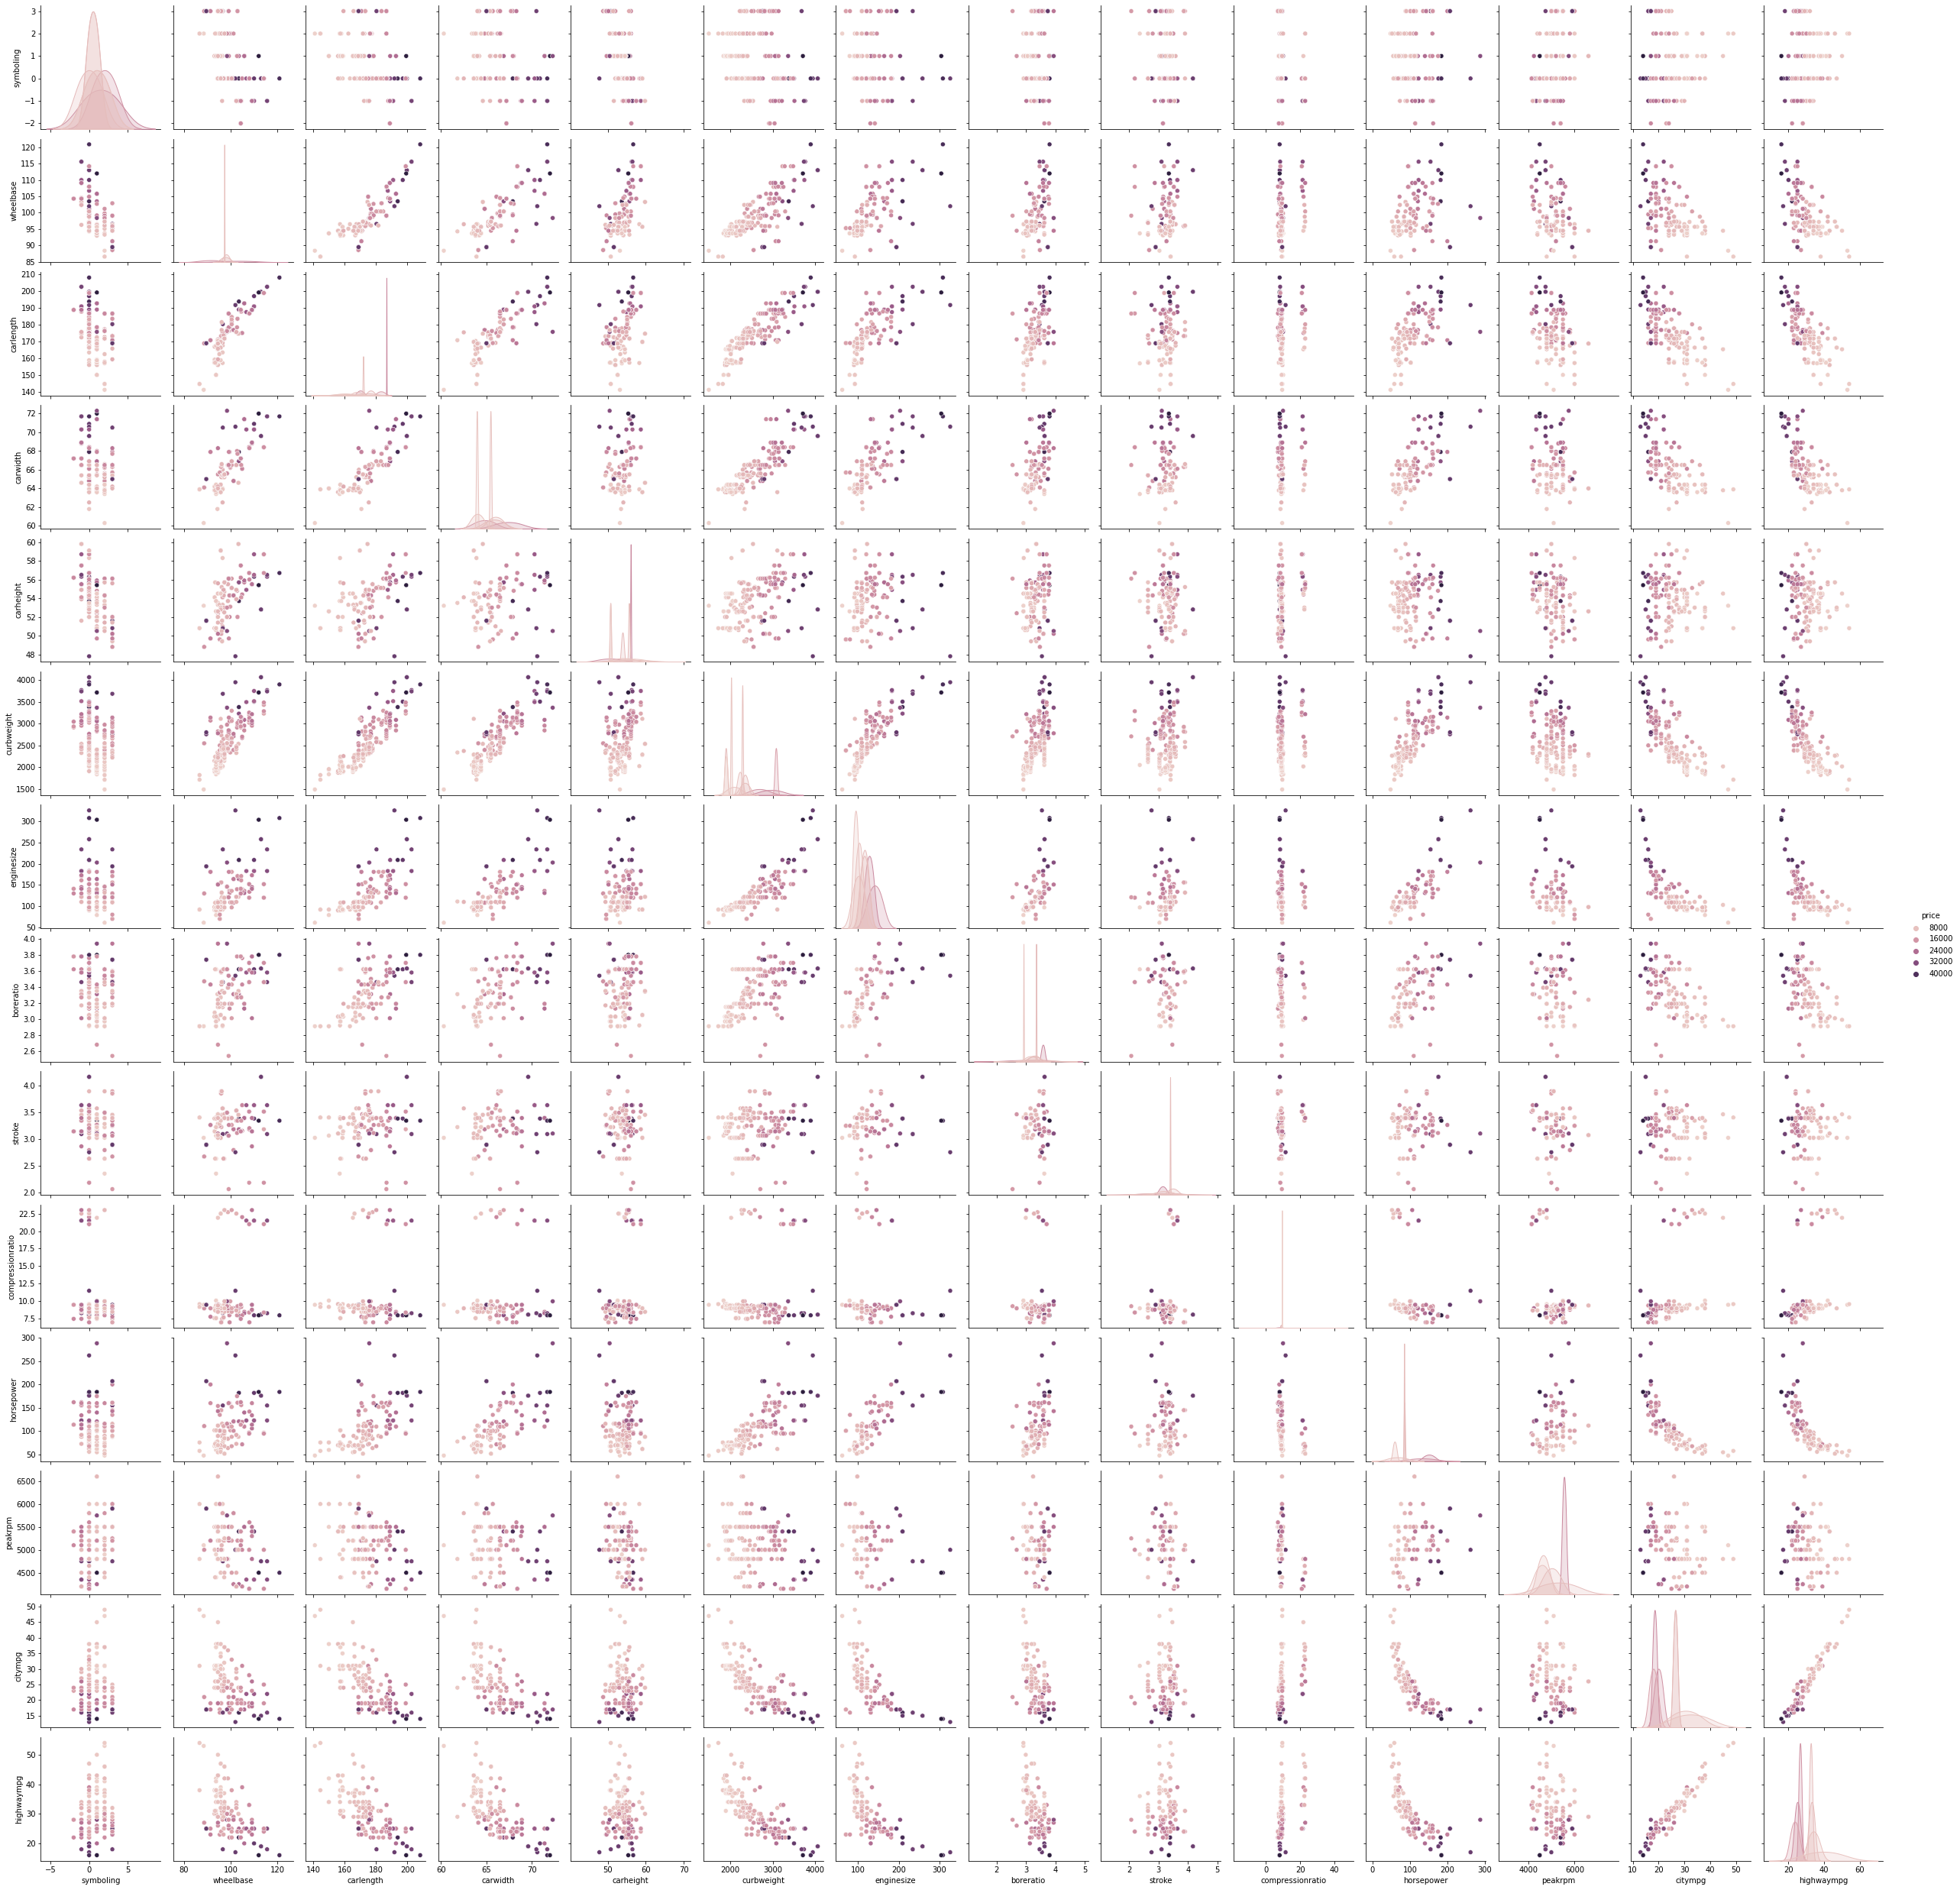

In [ ]:
Multivariate_Analysis()

In [ ]:
data_set.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


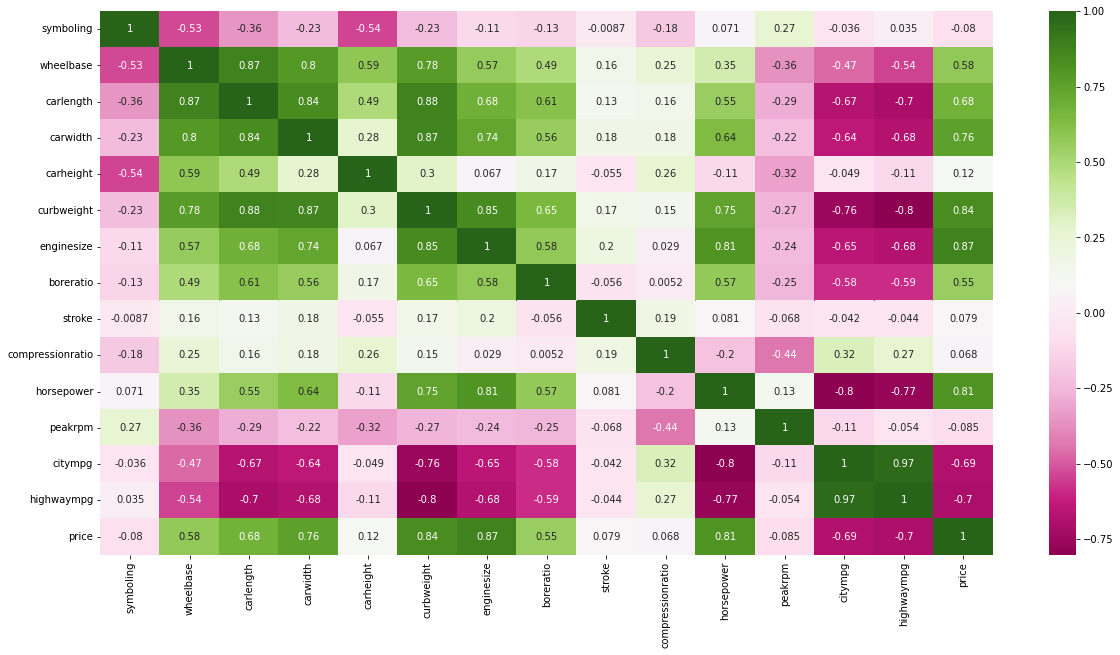

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(data_set.corr(), annot=True, cmap='PiYG')
plt.show()
plt.close()

In [ ]:
features = data_set.drop(['price'], axis=1)
target = data_set['price']

features = features.apply(pd.to_numeric, errors='coerce')
target = target.apply(pd.to_numeric, errors='coerce')

features.fillna(0, inplace=True)
target.fillna(0, inplace=True)

X_train , X_test, y_train , y_test = train_test_split(features, target, test_size=0.3, random_state=42)

for each in [X_train , X_test, y_train, y_test]:
    print(f"Shape: {each.shape}")

Shape: (143, 24)
Shape: (62, 24)
Shape: (143,)
Shape: (62,)


In [ ]:
X_train

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
car_ID,,,,,,,,,,,,,,,,,,,,,
178,-1,toyota mark ii,gas,std,four,hatchback,fwd,front,102.4,175.6,...,four,122,mpfi,3.31,3.54,8.7,92,4200,27,32
76,1,mercury cougar,gas,turbo,two,hatchback,rwd,front,102.7,178.4,...,four,140,mpfi,3.78,3.12,8.0,175,5000,19,24
175,-1,toyota celica gt,diesel,turbo,four,sedan,fwd,front,102.4,175.6,...,four,110,idi,3.27,3.35,22.5,73,4500,30,33
32,2,honda civic cvcc,gas,std,two,hatchback,fwd,front,86.6,144.6,...,four,92,1bbl,2.91,3.41,9.2,76,6000,31,38
13,0,bmw x1,gas,std,two,sedan,rwd,front,101.2,176.8,...,six,164,mpfi,3.31,3.19,9.0,121,4250,21,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,1,nissan clipper,gas,std,two,hatchback,rwd,front,99.2,178.5,...,six,181,mpfi,3.43,3.27,9.0,160,5200,19,25
15,1,bmw z4,gas,std,four,sedan,rwd,front,103.5,189.0,...,six,164,mpfi,3.31,3.19,9.0,121,4250,20,25
93,1,nissan latio,gas,std,four,sedan,fwd,front,94.5,165.3,...,four,97,2bbl,3.15,3.29,9.4,69,5200,31,37


In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

print(f"Bias: {linear_model.intercept_}")
print(f"Weights (m1, m2, ...., mn): \n\n{linear_model.coef_}")

Bias: -54867.34720446001
Weights (m1, m2, ...., mn): 

[ 3.27016490e+02 -3.57935903e-13  1.75433001e-11  5.28643795e-12
  7.67386155e-13 -9.94759830e-14 -1.70530257e-13 -1.70530257e-13
  1.36586513e+02 -7.38517319e+01  6.84132067e+02  1.37449591e+02
  8.15986711e-01  0.00000000e+00  0.00000000e+00  1.15357762e+02
  0.00000000e+00 -6.29512654e+02 -3.03990574e+03  2.65996990e+02
  1.60049388e+01  2.10012756e+00 -3.08382112e+02  8.47115400e+01]


In [ ]:
train_preds = linear_model.predict(X_train)
test_preds = linear_model.predict(X_test)

In [ ]:
def rmse_calculation(actual_train, pred_train, actual_test, pred_test):
    return f"RMSE Train: {sqrt(mean_squared_error(actual_train , pred_train)):.3f}\nRMSE Test: {sqrt(mean_squared_error(actual_test , pred_test)):.3f}"

In [ ]:
def score_calculation(model, X_train, X_test, y_train , y_test):
    return f"Train Score: {model.score(X_train, y_train)*100:.3f}\nTest Score: {model.score(X_test, y_test)*100:.3f}" 

In [ ]:
print(score_calculation(linear_model, X_train, X_test, y_train, y_test))
print('-'*20)
print(rmse_calculation(y_train, train_preds, y_test, test_preds))

Train Score: 86.824
Test Score: 80.024
--------------------
RMSE Train: 2833.829
RMSE Test: 3720.204


In [ ]:
actual_vs_pred_data = pd.DataFrame({'Actual Price': y_test.values, 'Predicted Price': test_preds})
actual_vs_pred_data.head(10)

,Actual Price,Predicted Price
0,30760.000,26208.153727
1,17859.167,17362.609133
2,9549.000,10091.449767
3,11850.000,14799.137112
4,28248.000,24902.620418
5,7799.000,6071.063463
6,7788.000,8136.120474
7,9258.000,6910.519118
8,10198.000,11488.638602
9,7775.000,9184.332470


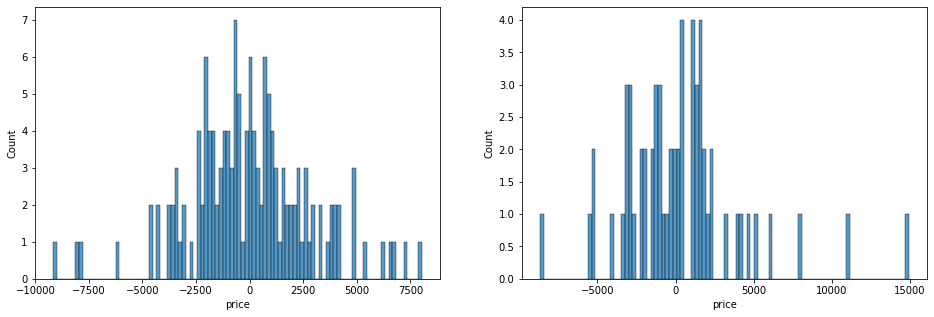

In [ ]:
train_error = (y_train - train_preds)
test_error = (y_test - test_preds)

fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(121)
sns.histplot(train_error, bins=100)

ax2 = fig.add_subplot(122)
sns.histplot(test_error, bins=100)
plt.show()
plt.close()